<a href="https://colab.research.google.com/github/Vishnu-MLOps/Object-Localization-Classification-Model/blob/main/37_Object_Class_localization%7Cclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedgobara/26-class-object-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mohamedgobara/26-class-object-detection-dataset/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/mohamedgobara/26-class-object-detection-dataset/versions/1/Senior-Design-VIAD-4

README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
dataset_path = '/root/.cache/kagglehub/datasets/mohamedgobara/26-class-object-detection-dataset/versions/1/Senior-Design-VIAD-4'

In [ ]:
#Reading the given text file
import glob
import os

text_file = glob.glob(os.path.join(dataset_path, '*.txt'))
with open(text_file[0], 'r') as f:
  lines = f.readlines()
for line in lines:
  print(line.strip())



Senior Design VIAD - v4 2023-11-20 1:02am

This dataset was exported via roboflow.com on February 6, 2024 at 3:35 PM GMT

Roboflow is an end-to-end computer vision platform that helps you
* collaborate with your team on computer vision projects
* collect & organize images
* understand and search unstructured image data
* annotate, and create datasets
* export, train, and deploy computer vision models
* use active learning to improve your dataset over time

For state of the art Computer Vision training notebooks you can use with this dataset,
visit https://github.com/roboflow/notebooks

To find over 100k other datasets and pre-trained models, visit https://universe.roboflow.com

The dataset includes 38952 images.
Cars-bikes-people are annotated in COCO format.

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 300x300 (Stretch)

The following augmentation was applied to create 3 versions of each source

In [ ]:
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')
validation_path = os.path.join(dataset_path, 'valid')

In [ ]:
import cv2
import matplotlib.pyplot as plt


train_images = glob.glob(os.path.join(train_path, '*.jpg'))
test_images = glob.glob(os.path.join(test_path, '*.jpg'))
validation_images = glob.glob(os.path.join(validation_path, '*.jpg'))

print(train_images[0])
print(len(train_images))
print(len(test_images))
print(len(validation_images))



/root/.cache/kagglehub/datasets/mohamedgobara/26-class-object-detection-dataset/versions/1/Senior-Design-VIAD-4/train/54_jpg.rf.1a6f4153cdf467ca165d116ec3c7059c.jpg
32511
2165
4246


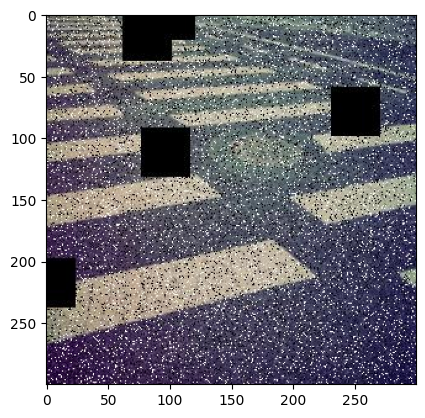

In [ ]:
sample_train = train_images[0]
img = cv2.imread(sample_train)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
#Checking for the file types in each folder
folder_path = train_path
files = glob.glob(folder_path + "/*")

# Extract unique file extensions
file_types = {os.path.splitext(file)[1] for file in files}

print("File types:", file_types)

folder_path = validation_path
files = glob.glob(folder_path + "/*")

# Extract unique file extensions
file_types = {os.path.splitext(file)[1] for file in files}

print("File types:", file_types)

File types: {'.json', '.jpg'}
File types: {'.json', '.jpg'}


In [ ]:
train_labels = glob.glob(os.path.join(train_path, '*.json'))
test_labels = glob.glob(os.path.join(test_path, '*.json'))
validation_labels = glob.glob(os.path.join(validation_path, '*.json'))

print(train_labels[0])

/root/.cache/kagglehub/datasets/mohamedgobara/26-class-object-detection-dataset/versions/1/Senior-Design-VIAD-4/train/_annotations.coco.json


In [ ]:
import json

with open(train_labels[0], 'r') as f:
  coco_data = json.load(f)
print(coco_data.keys())

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])


In [ ]:
import json

with open(test_labels[0], 'r') as ft:
  coco_data_test = json.load(ft)
print(coco_data_test.keys())

print("\nTotal Images:", len(coco_data_test['images']))
print("Total Annotations:", len(coco_data_test['annotations']))
print("Total Categories:", len(coco_data_test['categories']))
print("Total licenses:", len(coco_data_test['licenses']))
print("Total info?:", len(coco_data_test['info']))

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

Total Images: 2165
Total Annotations: 3730
Total Categories: 37
Total licenses: 1
Total info?: 6


In [ ]:
import json

with open(validation_labels[0], 'r') as fv:
  coco_data_valid = json.load(fv)
print(coco_data_valid.keys())

print("\nTotal Images:", len(coco_data_valid['images']))
print("Total Annotations:", len(coco_data_valid['annotations']))
print("Total Categories:", len(coco_data_valid['categories']))
print("Total licenses:", len(coco_data_valid['licenses']))
print("Total info?:", len(coco_data_valid['info']))


dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

Total Images: 4246
Total Annotations: 7255
Total Categories: 37
Total licenses: 1
Total info?: 6


In [ ]:
# List all image entries
print("Total Images:", len(coco_data['images']))
print("Total Annotations:", len(coco_data['annotations']))
print("Total Categories:", len(coco_data['categories']))
print("Total licenses:", len(coco_data['licenses']))
print("Total info?:", len(coco_data['info']))



Total Images: 32511
Total Annotations: 54480
Total Categories: 37
Total licenses: 1
Total info?: 6


In [ ]:
coco_data['images'][4]

{'id': 4,
 'license': 1,
 'file_name': 'z4640749814487_8f1346fd060119438434bf6838452337_jpg.rf.fb3fc09246bf7163ea34dceb4bfb0fce.jpg',
 'height': 300,
 'width': 300,
 'date_captured': '2024-02-06T15:35:56+00:00'}

In [ ]:
coco_data['annotations'][10]

{'id': 10,
 'image_id': 4,
 'category_id': 20,
 'bbox': [46, 145, 29, 56],
 'area': 1624,
 'segmentation': [],
 'iscrowd': 0}

In [ ]:
coco_data['annotations'][10]

{'id': 10,
 'image_id': 4,
 'category_id': 20,
 'bbox': [46, 145, 29, 56],
 'area': 1624,
 'segmentation': [],
 'iscrowd': 0}

In [ ]:
coco_data['images'][1]

{'id': 1,
 'license': 1,
 'file_name': 'a2_015_jpg.rf.fb6004be06889cefb1b1794baaadb3f0.jpg',
 'height': 300,
 'width': 300,
 'date_captured': '2024-02-06T15:35:56+00:00'}

In [ ]:
print('All categories:', coco_data['categories'])
print('\nLicense:', coco_data['licenses'])
print('\nInfo?:', coco_data['info'])


All categories: [{'id': 0, 'name': 'cars-bikes-people', 'supercategory': 'none'}, {'id': 1, 'name': 'Bus', 'supercategory': 'cars-bikes-people'}, {'id': 2, 'name': 'Bushes', 'supercategory': 'cars-bikes-people'}, {'id': 3, 'name': 'Person', 'supercategory': 'cars-bikes-people'}, {'id': 4, 'name': 'Truck', 'supercategory': 'cars-bikes-people'}, {'id': 5, 'name': 'backpack', 'supercategory': 'cars-bikes-people'}, {'id': 6, 'name': 'bench', 'supercategory': 'cars-bikes-people'}, {'id': 7, 'name': 'bicycle', 'supercategory': 'cars-bikes-people'}, {'id': 8, 'name': 'boat', 'supercategory': 'cars-bikes-people'}, {'id': 9, 'name': 'branch', 'supercategory': 'cars-bikes-people'}, {'id': 10, 'name': 'car', 'supercategory': 'cars-bikes-people'}, {'id': 11, 'name': 'chair', 'supercategory': 'cars-bikes-people'}, {'id': 12, 'name': 'clock', 'supercategory': 'cars-bikes-people'}, {'id': 13, 'name': 'crosswalk', 'supercategory': 'cars-bikes-people'}, {'id': 14, 'name': 'door', 'supercategory': 'cars

In [ ]:
names = set([category['name'] for category in coco_data['categories']])
supercategories = set([category['supercategory'] for category in coco_data['categories']])
print('All unique classes:', names, '\nNumber of unique classes:', len(names))
print('\n\nAll unique supercategories:', supercategories, '\nNumber of unique supercategories:', len(supercategories))


All unique classes: {'bicycle', 'traffic_cone', 'truck', 'fire_hydrant', 'Person', 'branch', 'car', 'pothole', 'tree', 'boat', 'Bus', 'gun', 'clock', 'sheep', 'bench', 'green_light', 'stop_sign', 'yellow_light', 'suitcase', 'backpack', 'scooter', 'Bushes', 'cars-bikes-people', 'elevator', 'door', 'motorcycle', 'umbrella', 'handbag', 'chair', 'red_light', 'crosswalk', 'person', 'Truck', 'stairs', 'train', 'rat', 'traffic light'} 
Number of unique classes: 37


All unique supercategories: {'cars-bikes-people', 'none'} 
Number of unique supercategories: 2


In [ ]:
first_img = coco_data['images'][0]
print(first_img)

{'id': 0, 'license': 1, 'file_name': '15103310083_e6cb39844c_o_jpg.rf.fb4b2ea34fd7128dc8390fab5df0fa71.jpg', 'height': 300, 'width': 300, 'date_captured': '2024-02-06T15:35:56+00:00'}


In [ ]:
annot = coco_data['annotations'][187]
print(annot)

{'id': 187, 'image_id': 130, 'category_id': 17, 'bbox': [165, 196, 46, 53.5], 'area': 2461, 'segmentation': [], 'iscrowd': 0}


In [ ]:

train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'test')
validation_path = os.path.join(dataset_path, 'valid')

In [ ]:
#Unrefined class to view the image
from torch.utils.data import Dataset
class OpenImages(Dataset):
  def __init__(self, coco_data, train=False, test=False, valid=False):
    self.coco_data = coco_data
    self.unique_classes = set([category['name'] for category in coco_data['categories']])
    self.unique_images = [coco_data['images'][i]['file_name'] for i in range(len(coco_data['images']))]
    self.unique_images_id = [coco_data['images'][i]['id'] for i in range(len(coco_data['images']))]
    self.annotations = coco_data['annotations']
    self.categories = coco_data['categories']
    self.train = train
    self.test = test
    self.valid = valid

  def __len__(self):
    return len(self.unique_images)

  def __getitem__(self, ix):
    image_id = self.unique_images_id[ix]
    image_path = self.unique_images[ix]
    if self.train:
      image = os.path.join(train_path, image_path)
    elif self.test:
      image = os.path.join(test_path, image_path)
    elif self.valid:
      image = os.path.join(validation_path, image_path)
    #Converting image
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape
    annotations_for_image = [ann for ann in self.annotations if ann['image_id'] == image_id]
    bboxes = [ann['bbox'] for ann in annotations_for_image]
    #Finding the corresponding classes of bboxes
    classes_ids = [ann['category_id'] for ann in annotations_for_image]
    classes = [self.categories[id]['name'] for id in classes_ids]

    return image, bboxes, classes

  def collate_fn(self, batch):
    return tuple(zip(*batch))


In [ ]:
ds = OpenImages(coco_data, train=True)
image_4, bboxes_4, classes_4 = ds[4]

[[44, 20, 146.256, 273.401], [248, 72, 51, 79], [192, 54, 43.5, 63], [196, 0, 42, 52], [279, 0, 21, 32], [0, 211, 38, 51.5], [46, 145, 29, 56], [0, 133, 18, 50.5], [68, 99, 22.5, 37], [29, 94, 26.5, 37.5], [41, 67, 22, 31], [28, 67, 14.5, 28.5], [78, 63, 12, 28], [90, 76, 16.5, 28.5], [98, 29, 16.5, 20.5], [100, 51, 12.5, 24], [180, 42, 10.5, 33], [121, 1, 10, 19]]


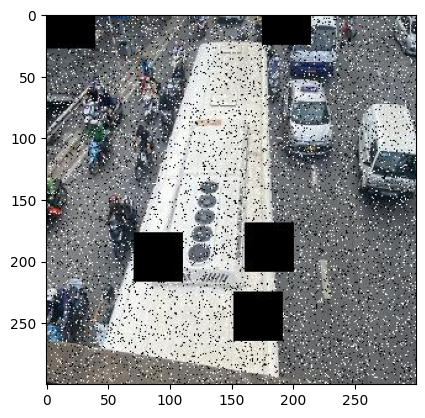

In [ ]:

plt.imshow(image_4)
print(bboxes_4)

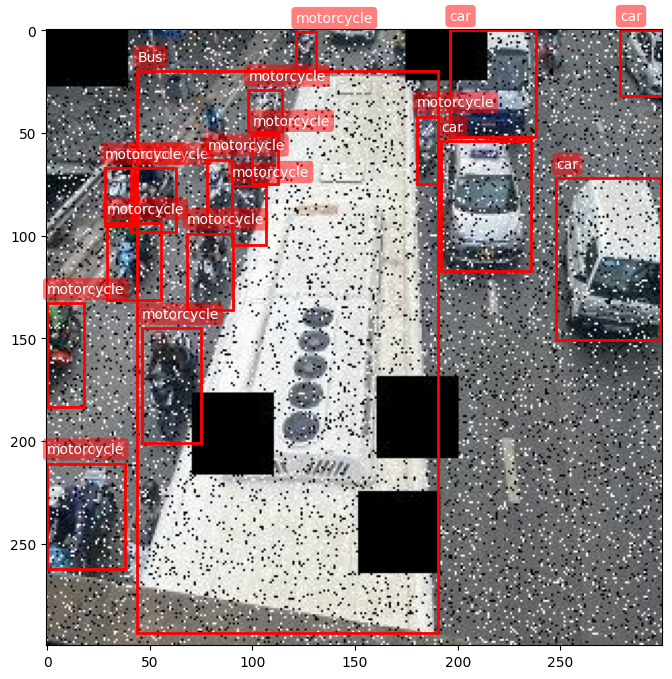

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class_names = classes_4
# Create figure and axes
fig, ax = plt.subplots(1, figsize=(8, 8))

# Show the image
ax.imshow(image_4)

# Add bounding boxes and labels
for bbox, class_name in zip(bboxes_4, class_names):
    x, y, w, h = bbox  # COCO format: [x_min, y_min, width, height]

    # Create a rectangle patch
    rect = patches.Rectangle(
        (x, y), w, h, linewidth=2, edgecolor='red', facecolor='none'
    )
    ax.add_patch(rect)

    # Add class label on top of the bounding box
    ax.text(
        x, y - 5, class_name, fontsize=10, color='white',
        bbox=dict(facecolor='red', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.3")
    )
plt.show()


Model Architecture

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
def get_model():
  model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
  in_features = model.roi_heads.box_predictor.cls_score.in_features
  model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=38) #The bounding box regression head in Faster R-CNN automatically predicts 4 values (x, y, width, height) per object
  return model   #Total Categories: 37

In [ ]:
from torchsummary import summary
model_sum = get_model()
print(model_sum.roi_heads)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RoIHeads(
  (box_roi_pool): MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(7, 7), sampling_ratio=2)
  (box_head): TwoMLPHead(
    (fc6): Linear(in_features=12544, out_features=1024, bias=True)
    (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (box_predictor): FastRCNNPredictor(
    (cls_score): Linear(in_features=1024, out_features=38, bias=True)
    (bbox_pred): Linear(in_features=1024, out_features=152, bias=True)
  )
)


In [ ]:
label2target = {l:t+1 for t, l in enumerate(names)}
label2target['background'] = 0
print(label2target)
target2label = {t:l for l, t in label2target.items()}
background_class = label2target['background']
print(target2label)

{'bicycle': 1, 'traffic_cone': 2, 'truck': 3, 'fire_hydrant': 4, 'Person': 5, 'branch': 6, 'car': 7, 'pothole': 8, 'tree': 9, 'boat': 10, 'Bus': 11, 'gun': 12, 'clock': 13, 'sheep': 14, 'bench': 15, 'green_light': 16, 'stop_sign': 17, 'yellow_light': 18, 'suitcase': 19, 'backpack': 20, 'scooter': 21, 'Bushes': 22, 'cars-bikes-people': 23, 'elevator': 24, 'door': 25, 'motorcycle': 26, 'umbrella': 27, 'handbag': 28, 'chair': 29, 'red_light': 30, 'crosswalk': 31, 'person': 32, 'Truck': 33, 'stairs': 34, 'train': 35, 'rat': 36, 'traffic light': 37, 'background': 0}
{1: 'bicycle', 2: 'traffic_cone', 3: 'truck', 4: 'fire_hydrant', 5: 'Person', 6: 'branch', 7: 'car', 8: 'pothole', 9: 'tree', 10: 'boat', 11: 'Bus', 12: 'gun', 13: 'clock', 14: 'sheep', 15: 'bench', 16: 'green_light', 17: 'stop_sign', 18: 'yellow_light', 19: 'suitcase', 20: 'backpack', 21: 'scooter', 22: 'Bushes', 23: 'cars-bikes-people', 24: 'elevator', 25: 'door', 26: 'motorcycle', 27: 'umbrella', 28: 'handbag', 29: 'chair', 3

In [ ]:
#Refined class to return image and targets as a dictionary, to meet expectation of F  RCNN
import torchvision.transforms as T

transform = T.Compose([
    T.ToTensor(),  # Converts (H, W, C) to (C, H, W) and normalizes to [0,1]
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


class OpenImagesForModel(Dataset):
  def __init__(self, coco_data, train=False, test=False, valid=False):
    self.coco_data = coco_data
    self.unique_classes = set([category['name'] for category in coco_data['categories']])
    self.unique_images = [coco_data['images'][i]['file_name'] for i in range(len(coco_data['images']))]
    self.unique_images_id = [coco_data['images'][i]['id'] for i in range(len(coco_data['images']))]
    self.annotations = coco_data['annotations']
    self.categories = coco_data['categories']
    self.train = train
    self.test = test
    self.valid = valid
    self.transform = T.Compose([
      T.ToTensor(),  # Converts (H, W, C) to (C, H, W) and normalizes to [0,1]
      T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      ])


  def __len__(self):
    return len(self.unique_images)

  def __getitem__(self, ix):
    image_id = self.unique_images_id[ix]
    image_path = self.unique_images[ix]
    if self.train:
      image = os.path.join(train_path, image_path)
    elif self.test:
      image = os.path.join(test_path, image_path)
    elif self.valid:
      image = os.path.join(validation_path, image_path)
    #Converting image
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image/255.0
    image = self.transform(image).type(torch.float32)
    h, w, _ = image.shape
    annotations_for_image = [ann for ann in self.annotations if ann['image_id'] == image_id]
    bboxes = []
    classes_ids = []
    for ann in annotations_for_image:
        bbox = ann['bbox']
        x_min, y_min, width, height = bbox
        x_max = x_min + width
        y_max = y_min + height
        x_min /= w
        y_min /= h
        x_max /= w
        y_max /= h
        if x_max > x_min and y_max > y_min:
          bboxes.append([x_min, y_min, x_max, y_max])
          classes_ids.append(ann['category_id'])

    classes = [self.categories[id]['name'] for id in classes_ids]

    target = {}
    target['boxes'] = torch.as_tensor(bboxes, dtype=torch.float32).reshape(-1, 4) #Faster R-CNN expects target['boxes'] to be a 2D tensor of shape: (Number of bboxes, no.of coordinates)
    target['labels'] = torch.as_tensor([label2target[c] for c in classes], dtype=torch.int64)

    return image, target

  def collate_fn(self, batch):
    return tuple(zip(*batch))


In [ ]:
debug = OpenImagesForModel(coco_data, train=True)
image1, target1 = debug[0]
image2, target2 = debug[1]
print(image1.shape)
print(target1, '\n')
print(image2.shape)
print(target2)


torch.Size([3, 300, 300])
{'boxes': tensor([[ 0.3033, 25.3333,  0.7050, 63.8333]]), 'labels': tensor([36])} 

torch.Size([3, 300, 300])
{'boxes': tensor([], size=(0, 4)), 'labels': tensor([], dtype=torch.int64)}


In [ ]:
train_ds = OpenImagesForModel(coco_data, train=True)
test_ds = OpenImagesForModel(coco_data_test, test=True)
valid_ds = OpenImagesForModel(coco_data_valid, valid=True)

from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=16, collate_fn=train_ds.collate_fn, shuffle=True, drop_last=True)
test_dl = DataLoader(test_ds, batch_size=16, collate_fn=test_ds.collate_fn, shuffle=False, drop_last=True)
valid_dl  = DataLoader(valid_ds, batch_size=16, collate_fn=valid_ds.collate_fn, shuffle=False, drop_last=True)


In [ ]:
print(f"Train dataset size: {len(train_ds)}")
print(f"Test dataset size: {len(test_ds)}")
print(f"Validation dataset size: {len(valid_ds)}")

train_batches = len(train_dl)
test_batches = len(test_dl)
valid_batches = len(valid_dl)

print(f"\nTrain batches: {train_batches}")
print(f"Test batches: {test_batches}")
print(f"Validation batches: {valid_batches}")


Train dataset size: 32511
Test dataset size: 2165
Validation dataset size: 4246

Train batches: 2031
Test batches: 135
Validation batches: 265


In [ ]:
def train_batch(inputs, model, optimizer):
  model.train()
  optimizer.zero_grad()
  input, targets = inputs
  # Remove the permute call and directly send the images to the device
  input = [image.to(device) for image in input]
  targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
  losses = model(input, targets)
  loss = sum(loss for loss in losses.values())
  loss.backward()
  optimizer.step()
  return loss.item()

In [ ]:
@torch.no_grad()
def vaidate_batch(inputs, model, optimizer):
  model.eval()
  input, targets = inputs
  # Change this line to match the training process:
  input = [image.to(device) for image in input]
  targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
  optimizer.zero_grad()
  losses = model(input, targets)
  loss = sum(loss for loss in losses.values())
  return loss.item()

In [ ]:
model = get_model()
model.to(device)
import torch.optim
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
images, targets = next(iter(valid_dl))  # Take one batch
# Reduce the batch size to 1 to reduce memory usage
# The error was due to the dimension mismatch, permute changes the order of the dimension
# from [300,H,W] to [3,H,W] - this error was due to the addition of batch_size to the list of images
# images = [image.permute(2, 0, 1).to(device) for image in images[:1]]  # Original problematic line

# Fix: Remove the unnecessary permutation
images = [image.to(device) for image in images[:1]]

targets = [{k: v.to(device) for k, v in t.items()} for t in targets[:1]]

model.train()
loss_dict = model(images, targets)
print(loss_dict)
print(targets)

{'loss_classifier': tensor(3.5831, device='cuda:0', grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(0.0056, device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(1.8000, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(1.6009, device='cuda:0', grad_fn=<DivBackward0>)}
[{'boxes': tensor([[3.6667e-02, 8.0000e+00, 8.0833e-01, 7.6333e+01]], device='cuda:0'), 'labels': tensor([7], device='cuda:0')}]


In [ ]:
losss = sum(loss.detach() for loss in loss_dict.values())
print(losss)
print(losss.item())

tensor(6.9896, device='cuda:0')
6.989613056182861


In [ ]:
actual_model = get_model()
actual_model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
from tqdm import tqdm

epochs = 5
train_losses, test_losses = [], []

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')

    # Training Loop with tqdm for batches
    train_loss_epoch = 0
    for ix, inputs in tqdm(enumerate(train_dl), total=len(train_dl), desc="Training Batches"):
        tr_epoch_loss = train_batch(inputs, actual_model, optimizer)
        train_loss_epoch += tr_epoch_loss

    avg_train_loss = train_loss_epoch / len(train_dl)
    print(f'Train Loss in Epoch {epoch + 1}: {avg_train_loss:.4f}')
    train_losses.append(avg_train_loss)

    # Validation Loop with tqdm for batches
    test_loss_epoch = 0
    for ix, inputs in tqdm(enumerate(test_dl), total=len(test_dl), desc="Validation Batches"):
        te_epoch_loss = vaidate_batch(inputs, actual_model, optimizer)
        test_loss_epoch += te_epoch_loss

    avg_test_loss = test_loss_epoch / len(test_dl)
    print(f'🔍 Test Loss in Epoch {epoch + 1}: {avg_test_loss:.4f}')
    test_losses.append(avg_test_loss)


Epoch 1/5


Training Batches:   0%|          | 0/2031 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 158.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 58.12 MiB is free. Process 3926 has 14.68 GiB memory in use. Of the allocated memory 14.18 GiB is allocated by PyTorch, and 372.34 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import seaborn as sns

sns.lineplot(x=range(1, epochs+1), y=train_losses, label='Train')
sns.lineplot(x=range(1, epochs+1), y=test_losses, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model perfomance')

Predicting on a New Image

In [ ]:
from torchvision.ops import nms
import numpy as np

def decode_output(output):
  bbs = output['boxes'].cpu().detach().numpy()
  out_labels = output['labels'].cpu().detach().numpy()
  labels = np.array([target2label[l] for l in out_labels])
  scores = output['scores'].cpu().detach().numpy()
  ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(scores), 0.5)
  bbs = bbs[ixs]
  labels = labels[ixs]
  scores = scores[ixs]
  return bbs.tolist(), labels.tolist(), scores.tolist()

In [ ]:
actual_model.eval()
for ix, (images, targets) in enumerate(valid_dl):
  if ix == 5:
    break
  images = [im for im in images]
  outputs = actual_model(images)
  for ix, output in enumerate(outputs):
    bbs, labels, scores = decode_output(output)
    image = images[ix].permute(1, 2, 0).cpu().detach().numpy()
    plot_img(image, bbs, labels)


In [ ]:
def plot_img(image, bbs, labels):
  fig, ax = plt.subplots(1, figsize=(8, 8))
  ax.imshow(image_4)
  for bbox, class_name in zip(bbs, labels):
    x, y, w, h = bbox  # COCO format: [x_min, y_min, width, height]
    rect = patches.Rectangle(
        (x, y), w, h, linewidth=2, edgecolor='red', facecolor='none'
    )
    ax.add_patch(rect)
    # Add class label on top of the bounding box
    ax.text(
        x, y - 5, class_name, fontsize=10, color='white',
        bbox=dict(facecolor='red', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.3")
    )
  plt.show()